In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<Axes: ylabel='Frequency'>

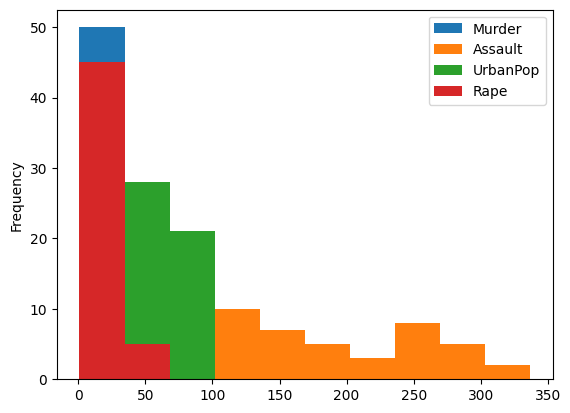

In [6]:
crime.plot.hist()

In [7]:
crime[crime.duplicated()].shape

(0, 5)

In [8]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

HIERARCHICAL

In [9]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
crime=(crime.iloc[:,1:])
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [11]:

# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])

In [12]:
crime_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


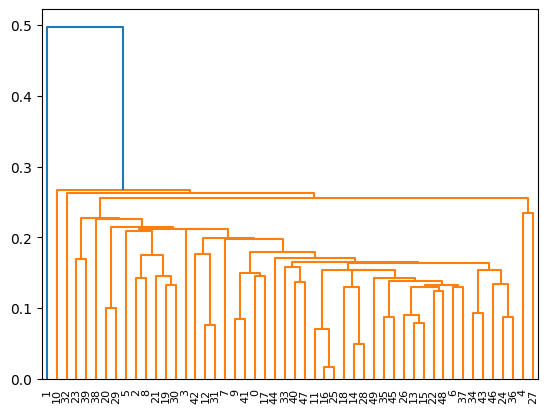

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

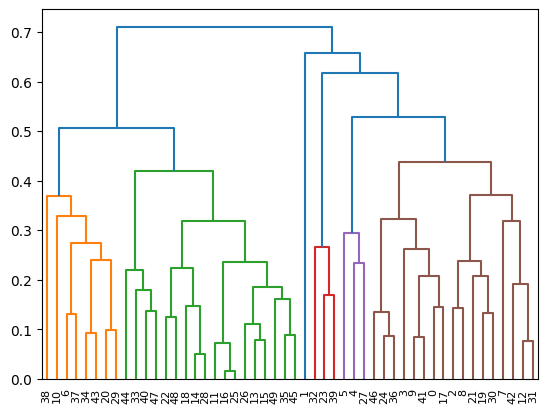

In [14]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='average'))

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [16]:
clusters=pd.DataFrame(hc.fit_predict(crime_norm),columns=['Clusters'])
clusters['Clusters'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    48
1     1
2     1
Name: Clusters, dtype: int64

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
crime['Clusters']=clusters
crime

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


K-MEANS

In [20]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

<Axes: xlabel='X', ylabel='Y'>

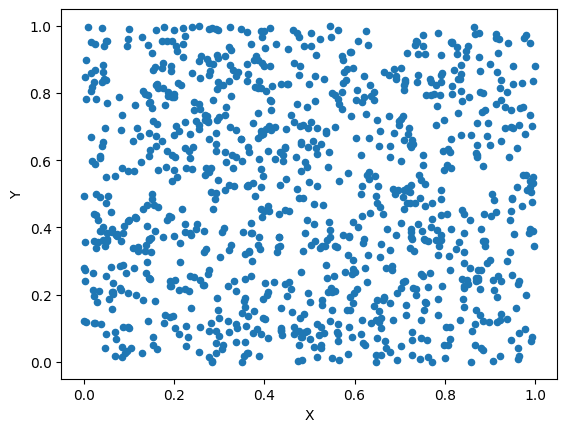

In [21]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [22]:
X = np.random.uniform(0,1,1000)
X

array([0.08675502, 0.63412584, 0.58353136, 0.94326176, 0.13496676,
       0.46414326, 0.2151418 , 0.14399039, 0.59246111, 0.97177473,
       0.33194776, 0.57388382, 0.7486798 , 0.52017306, 0.15231088,
       0.80755903, 0.44189955, 0.67074457, 0.90365978, 0.34106614,
       0.34201274, 0.55828645, 0.01295561, 0.27530816, 0.75131187,
       0.24038627, 0.250876  , 0.97278234, 0.05257592, 0.7045027 ,
       0.26279648, 0.63243686, 0.98361163, 0.26539004, 0.58702364,
       0.95714056, 0.27077752, 0.02712538, 0.76170295, 0.68316129,
       0.39914   , 0.05976834, 0.93337941, 0.63546697, 0.69732211,
       0.51689507, 0.62903569, 0.70042951, 0.7234121 , 0.78418655,
       0.32112696, 0.52379765, 0.84557711, 0.99974065, 0.44784426,
       0.31653823, 0.26989689, 0.34764369, 0.59434154, 0.14706666,
       0.7612304 , 0.3238248 , 0.41421988, 0.41260056, 0.99221578,
       0.81354739, 0.4210843 , 0.00949578, 0.94740368, 0.35072146,
       0.58099772, 0.01901408, 0.6137845 , 0.40163208, 0.27143

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='X', ylabel='Y'>

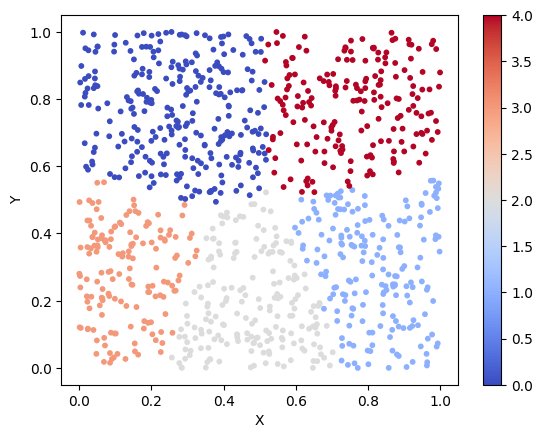

In [23]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [25]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [26]:
crime1=pd.read_csv("crime_data.csv")
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime1.iloc[:,1:])


df_norm.head(10)  # Top 10 rows

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [29]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model=KMeans(n_clusters=5)
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 1, 4, 1, 1, 0, 0, 1, 3, 0, 2, 1, 4, 2, 4, 4, 3, 2, 1, 0, 1,
       2, 3, 1, 4, 4, 1, 2, 0, 1, 1, 3, 2, 0, 4, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 4, 0, 2, 2, 4], dtype=int32)

In [30]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object
crime1['clust']=md # creating a  new column and assigning it to new column
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [32]:
crime1.iloc[:,1:7].groupby(crime1.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.036364,138.727273,78.181818,18.654545,0.0
1,10.815385,257.384615,76.000000,33.192308,1.0
2,2.680000,70.100000,51.000000,10.910000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,7.100000,134.000000,59.888889,18.222222,4.0


In [33]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,1


In [34]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    Wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

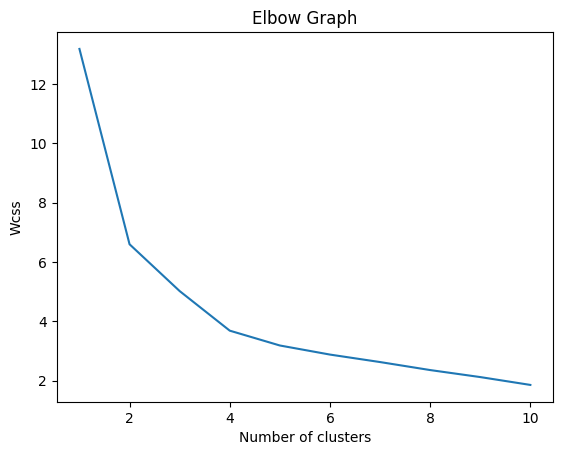

In [35]:
plt.plot(range(1,11),Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

DBSCAN

In [36]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (2).csv


In [41]:
crime2=pd.read_csv("crime_data.csv")
print(crime2.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [42]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
 4   Clusters  50 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [44]:
crime2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [45]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   0. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   2. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ],
       [ 11.3, 300. ,  67. ,  27.8,   0. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   0. ],
       [  2.7,  72. ,  66. ,  14

In [46]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [47]:
X

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -1.93246988e-01],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  3.02753614e+00],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -1.93246988e-01],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -1.93246988e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -1.93246988e-01],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -1.93246988e-01],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -1.93246988e-01],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01, -1.93246988e-01],
       [ 1.76541475e+00,  1.99078607e+00,  1.00912225e+00,
         1.15053010e+00, -1.93246988e-01],
       [ 2.22926518e+00,  4.87757131e-01, -3.86620834e-01,
         4.92652934e-01

In [48]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [49]:

#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [50]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [52]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [53]:

pd.concat([crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,Clusters,cluster
0,13.2,236,58,21.2,0,-1
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,0,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,0,-1
